In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("TRAIN.csv")
test = pd.read_csv("TEST.csv")

In [3]:
train.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,...,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75,0
1,1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,...,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38,0
2,2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,...,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95,0
3,3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,...,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.04,0
4,4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,...,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.00,0


In [4]:
train.shape

(284455, 31)

In [5]:
train.isna().sum()

Index     0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
train['Class'].value_counts()

0    284015
1       440
Name: Class, dtype: int64

In [7]:
fraud = train[train['Class']==1]
not_fraud = train[train['Class']==0]

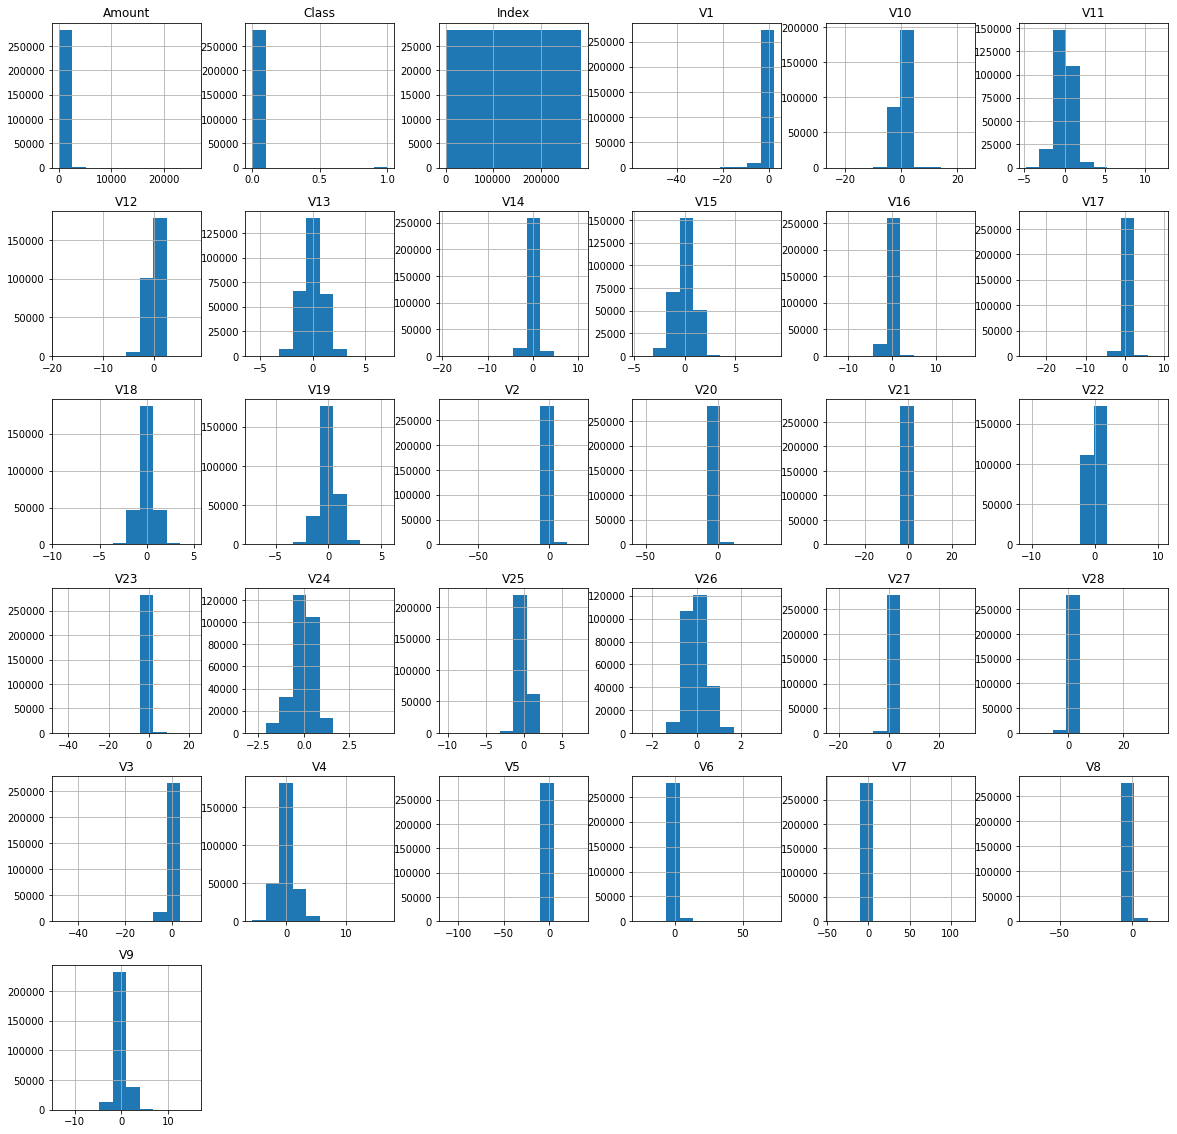

In [8]:
train.hist(figsize=(20,20));

In [9]:
fraud.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
446,446,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,...,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,5.91,1
561,561,-3.843009,3.375110,-5.492893,6.136378,2.797195,-2.646162,-1.668931,-2.617552,-3.945843,...,-1.277812,0.719652,0.451125,-0.258094,0.656129,0.556676,0.739383,-0.203050,1.00,1
1304,1304,-1.410852,2.268271,-2.297554,1.871331,0.248957,-1.208799,-1.358648,1.102916,-1.317364,...,0.155381,-0.614880,-0.196126,-0.464376,0.118473,-0.484537,0.373596,0.187657,1.00,1
3149,3149,-3.951209,2.881805,-6.421490,2.434181,-1.327325,-2.122106,-3.227533,-0.685560,0.775985,...,1.410479,0.279403,0.570821,0.656271,-0.298601,-0.407571,-1.378703,1.379130,52.69,1
4041,4041,-1.125092,3.682876,-6.556168,4.016731,-0.425571,-2.031210,-2.650137,1.131249,-2.946890,...,1.185580,1.348156,-0.053686,0.284122,-1.174469,-0.087832,0.718790,0.676216,0.76,1


In [10]:
fraud["Amount"].describe()

count     440.000000
mean      118.423773
std       245.493158
min         0.000000
25%         1.000000
50%         9.170000
75%       106.130000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
not_fraud["Amount"].describe()

count    284015.000000
mean         88.313070
std         250.182582
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

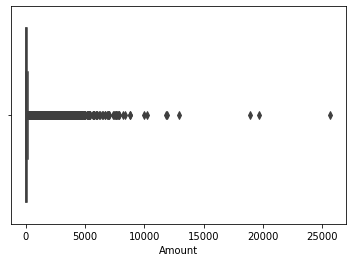

In [12]:
sns.boxplot(not_fraud["Amount"])

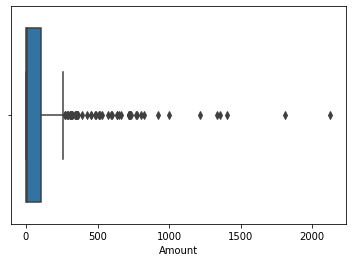

In [13]:
sns.boxplot(fraud["Amount"])

In [14]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

In [15]:
train.columns[1:29]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [16]:
variables = train.columns[1:29]

In [17]:
train[variables]=scaler.fit_transform(train[variables].values)

In [18]:
train.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.996044,-0.874539,-1.119741,-0.885963,-0.424291,-1.057981,-0.102001,-1.264210,-1.547528,...,0.096464,0.480935,-0.173749,0.009913,0.549236,0.274789,-0.300783,-0.579433,74.75,0
1,1,0.563679,0.026628,0.173246,0.015165,-0.513467,-0.908357,-0.009168,-0.595175,0.144597,...,-0.125255,-0.176654,0.291350,0.943260,0.304440,1.744095,-0.494585,-0.023770,1.38,0
2,2,0.647697,-0.027922,-0.354315,-0.411045,-0.069543,-0.774641,0.015854,-0.825745,-1.055203,...,-0.493220,-0.669725,0.032147,-0.271626,0.774465,-0.709133,0.001158,0.150097,10.95,0
3,3,-0.420638,-0.311543,1.018248,-0.488097,0.290341,-0.760869,0.210747,-0.507446,-0.584238,...,-0.658538,-0.236783,-0.111631,0.801102,-0.000527,-1.201210,-0.221273,-0.579327,8.04,0
4,4,-0.529944,0.135654,1.005962,0.097535,-0.014375,1.015533,0.636531,0.621817,-0.299703,...,0.400208,0.010105,0.427144,0.749666,0.713413,-1.229423,0.171666,0.610120,175.00,0


In [19]:
variables_test = test.columns[1:29]

In [20]:
test[variables_test]=scaler.fit_transform(test[variables_test].values)

In [21]:
test.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,0.840604,-0.740769,-0.663122,-0.057116,0.127274,-0.027692,0.228290,-0.425982,0.960480,...,0.560702,-0.358390,-0.581810,-0.184610,-1.318934,-0.134012,0.113482,-0.343789,-0.312047,186.76
1,1,-0.219291,0.566387,0.490501,1.207059,0.912311,0.266496,0.970070,-0.511493,-0.720174,...,-0.526382,0.835559,0.969443,-0.534585,1.355441,-0.340169,0.276014,-1.464941,-0.183257,21.18
2,2,0.534188,-0.785168,0.286126,-1.164328,-0.243868,1.468673,-0.729629,0.919537,1.805927,...,-0.481382,-0.028922,0.428759,0.323959,-1.234358,0.286061,-0.977943,0.829214,-0.054653,1.00
3,3,-1.720704,2.659102,-2.120592,2.047147,-3.105802,-0.791699,-5.424234,4.772653,-2.297264,...,1.719729,3.846851,0.471915,0.165540,-0.021289,-0.336930,-0.033703,2.307719,2.850438,14.46
4,4,0.596125,-0.070413,0.061159,0.422973,0.218631,0.393930,0.138228,-0.109006,0.156570,...,0.104381,-0.335008,-0.261165,-0.818385,-0.612037,1.160750,-0.320650,0.046288,-0.055064,27.00


In [22]:
train.columns[30]

'Class'

In [23]:
target = train.columns[30]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = train.drop("Class", axis = 1)

In [26]:
Y = train["Class"]

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [28]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before Undersampling, counts of label '1': 344
Before Undersampling, counts of label '0': 227220 



In [30]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
x_train_miss, y_train_miss = nr.fit_sample(x_train, y_train.ravel()) 

In [31]:
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After Undersampling, counts of label '1': 344
After Undersampling, counts of label '0': 344


In [32]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train_miss, y_train_miss)

GaussianNB()

In [33]:
y_pred = gnb.predict(x_test)

In [34]:
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 89.93338137842541


In [35]:
y_pred_test = gnb.predict(test)

In [36]:
output = pd.DataFrame({'Class': y_pred_test})
output.to_csv('my_submission.csv', index=False)